In [1]:
#!pip install numpy xlrd pandas matplotlib seaborn sklearn

In [2]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [3]:
# %%timeit -n 1
# Load your data  -- start with CreditScoring.csv... then online retail
#df = pd.read_csv('https://raw.githubusercontent.com/fenago/pythonml/main/data/CleanCreditScoring.csv')
#  you can also pull from urls like this:   
df = pd.read_csv('https://raw.githubusercontent.com/fenago/MLEssentials/main/datasets/Life%20Expectancy%20Data.csv')

## Notes

This session covers data collection and some procedures of data preparation. 

**Commands, functions, and methods:** 

* `!wget` - Linux shell command for downloading data 
* `pd.read.csv()` - read csv files 
* `df.head()` - take a look of the dataframe 
* `df.head().T` - take a look of the transposed dataframe 
* `df.columns` - retrieve column names of a dataframe 
* `df.columns.str.lower()` - lowercase all the letters 
* `df.columns.str.replace(' ', '_')` - replace the space separator 
* `df.dtypes` - retrieve data types of all series 
* `df.index` - retrive indices of a dataframe
* `pd.to_numeric()` - convert a series values to numerical values. The `errors=coerce` argument allows making the transformation despite some encountered errors. 
* `df.fillna()` - replace NAs with some value 
* `(df.x == "yes").astype(int)` - convert x series of yes-no values to numerical values.
* `df['Weight'] = df['Weight'].astype(int)` - this takes a single column of data and converts the data type

In [4]:
len(df)

2938

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.shape

(2938, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [9]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [10]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [11]:
# MAKE SURE THAT YOU WRANGLE YOUR DATA.  THIS IS AN EXAMPLE OF THE TYPES OF THINGS THAT ARE NEEDED
# SKIP THIS CEL - IT IS ONLY TO REITERATE THE NEED TO CLEAN 
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced
# Obviously don't run this with your dataset
# for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
#df = df[df.status != 'unk']   # Also make sure to treat the target variable

In [12]:
df.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,afghanistan,2015,developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,afghanistan,2014,developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,afghanistan,2013,developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,afghanistan,2012,developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,afghanistan,2011,developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
df.head().T

,0,1,2,3,4
country,afghanistan,afghanistan,afghanistan,afghanistan,afghanistan
year,2015,2014,2013,2012,2011
status,developing,developing,developing,developing,developing
life_expectancy_,65.0,59.9,59.9,59.5,59.2
adult_mortality,263.0,271.0,268.0,272.0,275.0
infant_deaths,62,64,66,69,71
alcohol,0.01,0.01,0.01,0.01,0.01
percentage_expenditure,71.279624,73.523582,73.219243,78.184215,7.097109
hepatitis_b,65.0,62.0,64.0,67.0,68.0
measles_,1154,492,430,2787,3013


### Create Visuals so you can gain a business understanding of your data

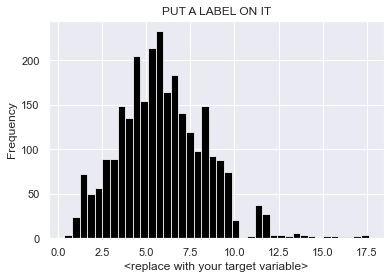

In [15]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.total_expenditure, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('<replace with your target variable>')
plt.title('PUT A LABEL ON IT')

plt.show()

## Notes
* (1) Check for NaN under a single DataFrame column:

* `df['your column name'].isnull().values.any()`

* (2) Count the NaN under a single DataFrame column:

`df['your column name'].isnull().sum()`

* (3) Check for NaN under an entire DataFrame:

`df.isnull().values.any()`

* (4) Count the NaN under an entire DataFrame:

`df.isnull().sum().sum()`

In [16]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy_                    10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles_                             0
_bmi_                               34
under-five_deaths_                   0
polio                               19
total_expenditure                  226
diphtheria_                         19
_hiv/aids                            0
gdp                                448
population                         652
_thinness__1-19_years               34
_thinness_5-9_years                 34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [17]:
# Check for the percentage of missing values
df.isnull().sum() / df.shape[0] * 100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy_                    0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles_                            0.000000
_bmi_                               1.157250
under-five_deaths_                  0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria_                         0.646698
_hiv/aids                           0.000000
gdp                                15.248468
population                         22.191967
_thinness__1-19_years               1.157250
_thinness_5-9_years                 1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [18]:
#check Value Counts
# df."REPLACE WITH FIELD NAME".value_counts()
df.value_counts()

country      year  status      life_expectancy_  adult_mortality  infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles_  _bmi_  under-five_deaths_  polio  total_expenditure  diphtheria_  _hiv/aids  gdp          population  _thinness__1-19_years  _thinness_5-9_years  income_composition_of_resources  schooling
afghanistan  2000  developing  54.8              321.0            88             0.01     10.424960               62.0         6532      12.2   122                 24.0   8.20               24.0         0.1        114.560000   293756.0    2.3                    2.5                  0.338                            5.5          1
nicaragua    2005  developing  71.2              194.0            3              3.70     218.571618              86.0         0         46.4   4                   87.0   6.11               86.0         0.3        1175.116225  5379328.0   2.0                    1.9                  0.592                            11.0         1
niger       

In [25]:
df.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,afghanistan,2015,developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,afghanistan,2014,developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,afghanistan,2013,developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,afghanistan,2012,developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,afghanistan,2011,developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [ ]:
# Split Data
# i.e.:  address = London, UK
# df[['city', 'country']] = df['address'].str.split(',', expand=True)

In [ ]:
# Change any Data Types
#Replace Data Types to Integer
# df["Customer Number"] = df['Customer Number'].astype('int')
#Replace Data Types to String
# df["Customer Number"] = df['Customer Number'].astype('str')
#Replace Data Types to Boolean
# df["IsPurchased"] = df['IsPurchased'].astype('bool')
#Replace Data Types to Float
# df["Total Spend"] = df['Total Spend'].astype('float')
#Replace Data Types to Datetime with format= '%Y%m%d'
# df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d')

## Univariate Analysis

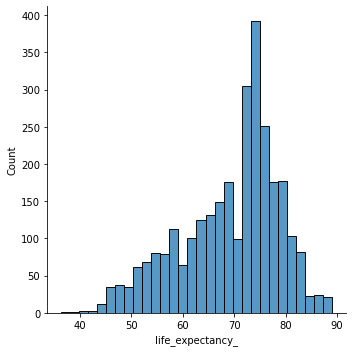

In [15]:
## STICK TO CATEGORICAL COLUMNS INITIALLY
#plot the histogram to see the distribution of the point data.
sns.displot(data=df, x="life_expectancy_")

<AxesSubplot:xlabel='life_expectancy_', ylabel='count'>

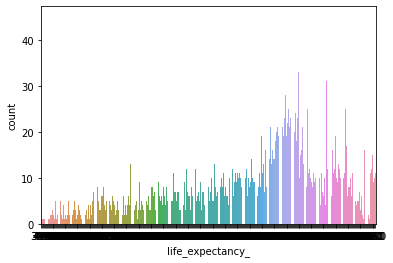

In [16]:
sns.countplot(x="life_expectancy_", data=df)

In [17]:
df['life_expectancy_'].value_counts()

73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: life_expectancy_, Length: 362, dtype: int64

In [20]:
#measure its skewness and kurtosis
df['life_expectancy_'].agg(['skew', 'kurtosis']).transpose()

skew       -0.638605
kurtosis   -0.234477
Name: life_expectancy_, dtype: float64

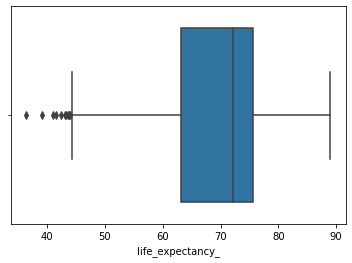

In [22]:
#check for outliers
ax = sns.boxplot(x=df["life_expectancy_"])

![image info](https://miro.medium.com/max/1400/1*_aN1iaiVUTdoyPbyj-kVjA.jpeg)

## Bivariate Analysis

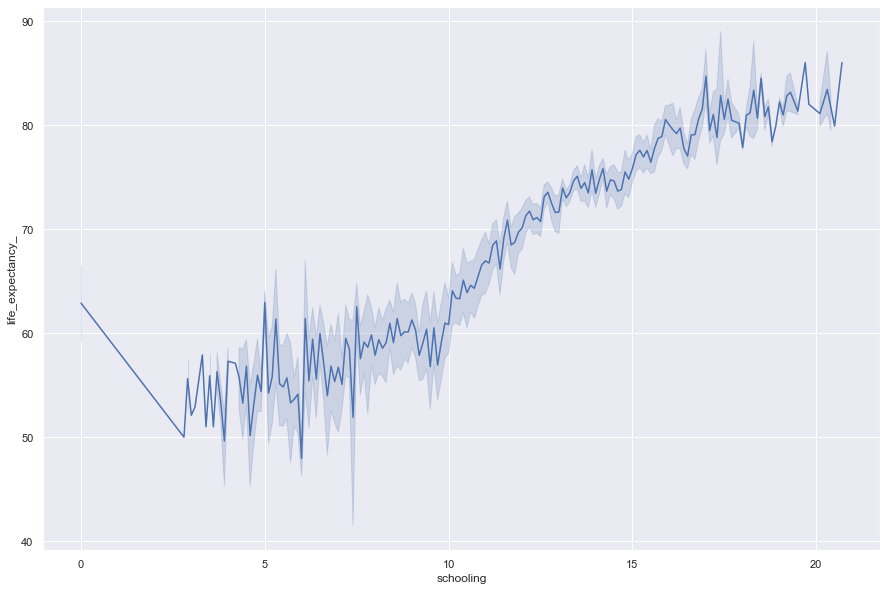

In [37]:
# Pick 2 variables to compare and replace SEX and DEFAULT WITH THE TWO VARIABLES
# Stick with Categorical variables for now
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.lineplot(x='schooling', y='life_expectancy_', data=df)
# edu.set_xticklabels(['percentage'])
plt.show()

In [38]:
# Evaluate the Cross Tab
pd.crosstab(df.schooling,df.life_expectancy_,normalize='index',margins=True)

life_expectancy_,36.3,39.0,41.0,41.5,42.3,43.1,43.3,43.5,43.8,44.0,...,83.3,83.4,83.5,83.7,84.0,85.0,86.0,87.0,88.0,89.0
schooling,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Correlation

<AxesSubplot:>

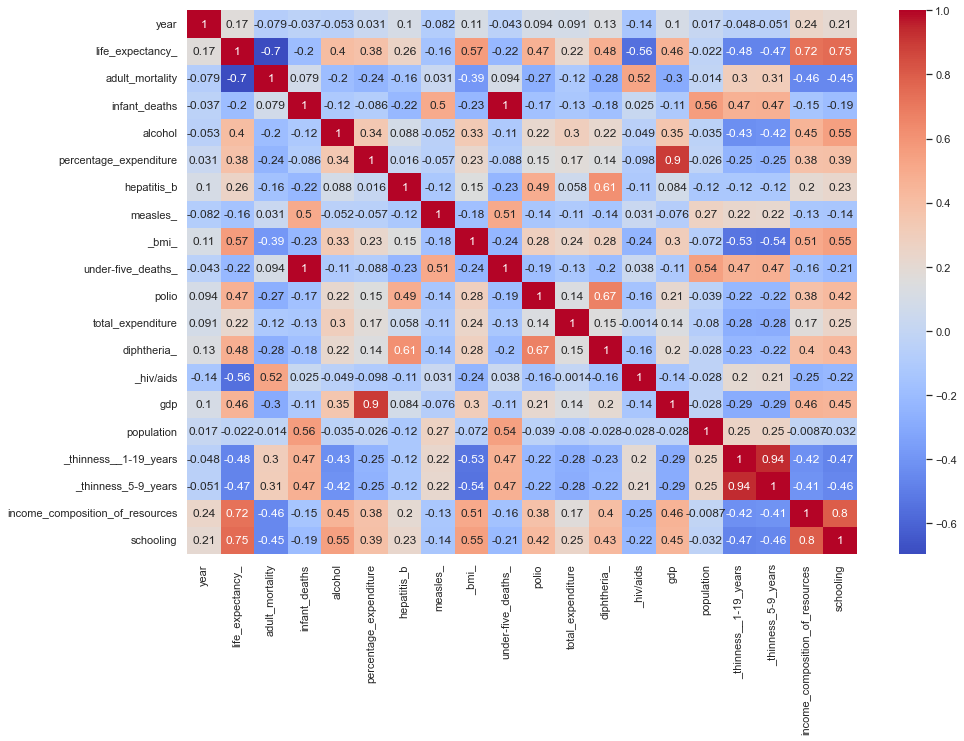

In [32]:
# Pearson Correlation
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')
#How does Infant and Adult mortality rates affect life expectancy?



In [33]:
# Spearman Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

<AxesSubplot:>

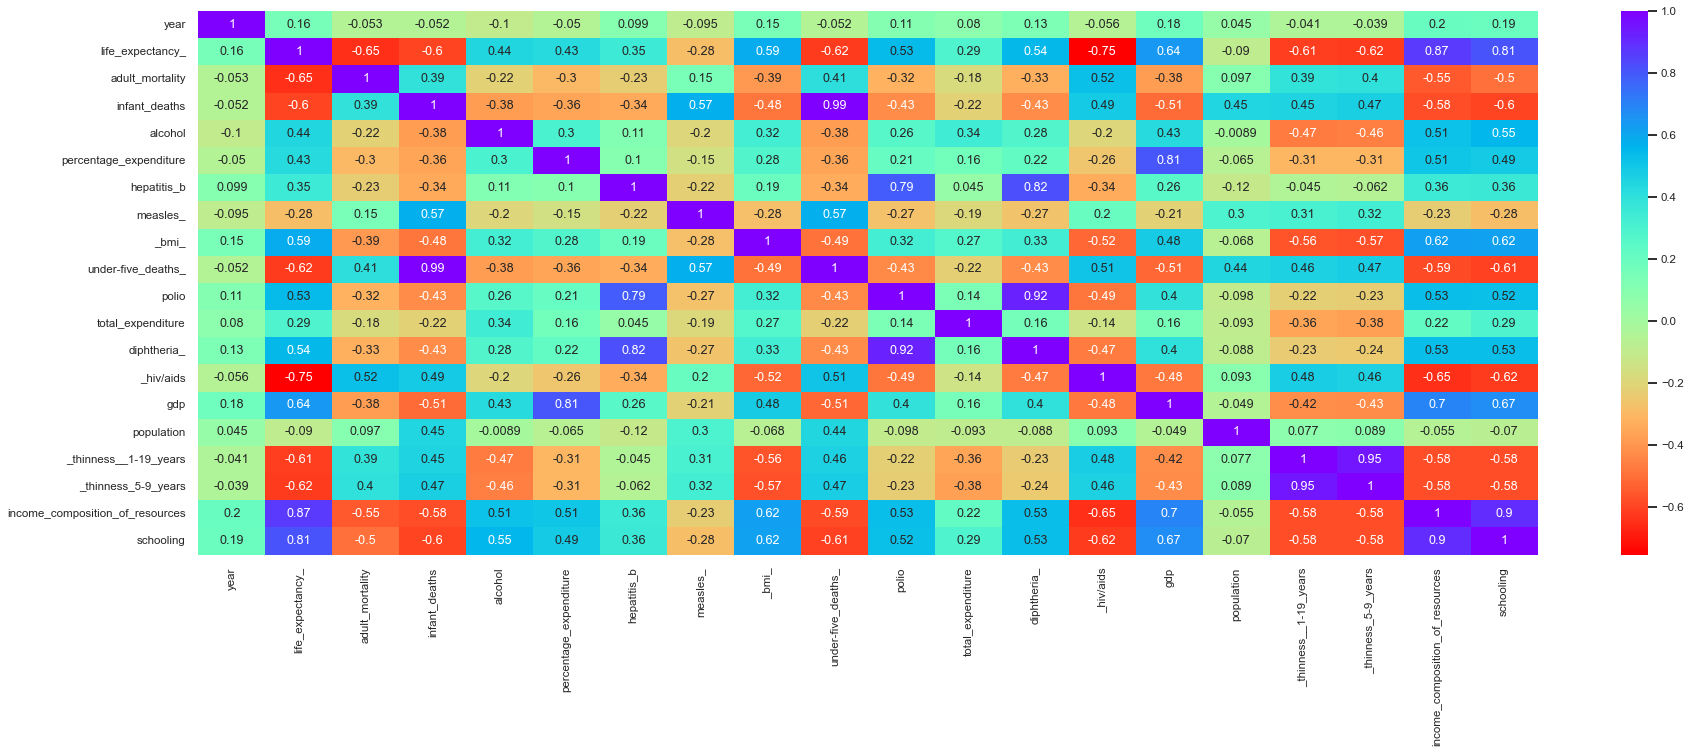

In [34]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [ ]:
# To get the Correlation between your variable of interest and the rest of the variables
# - replace "DEFAULT" with your variable of interest.
df.drop("DEFAULT", axis=1).apply(lambda x: x.corr(df.DEFAULT,method='spearman'))